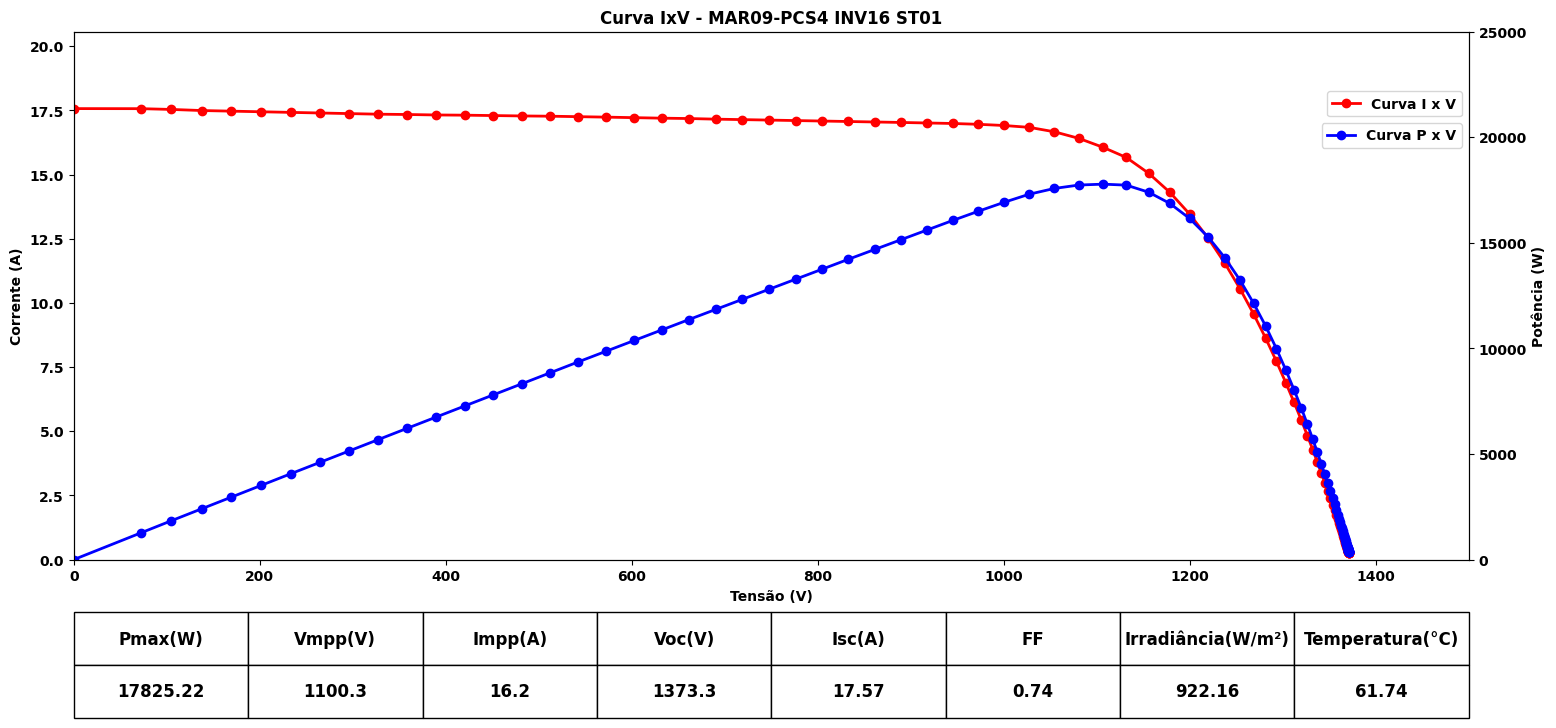

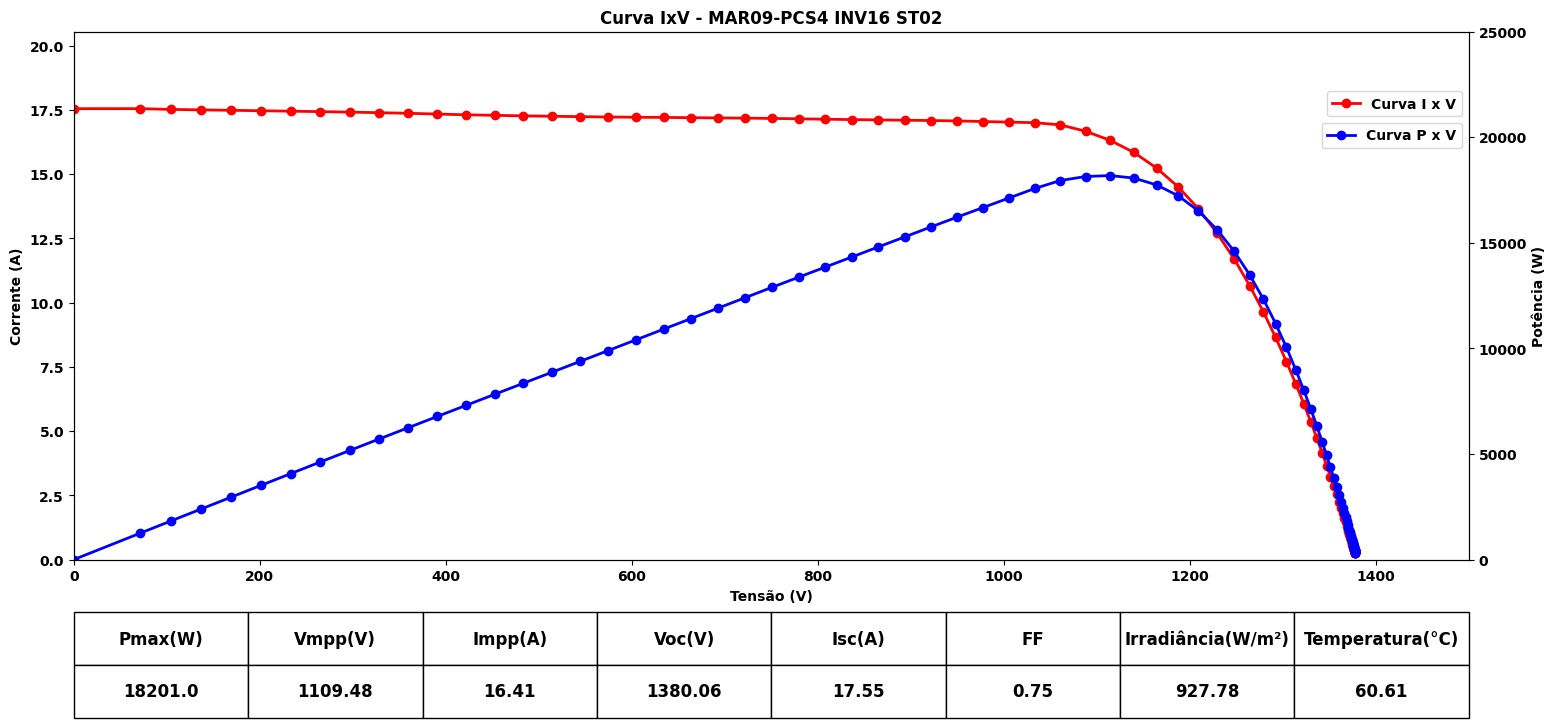

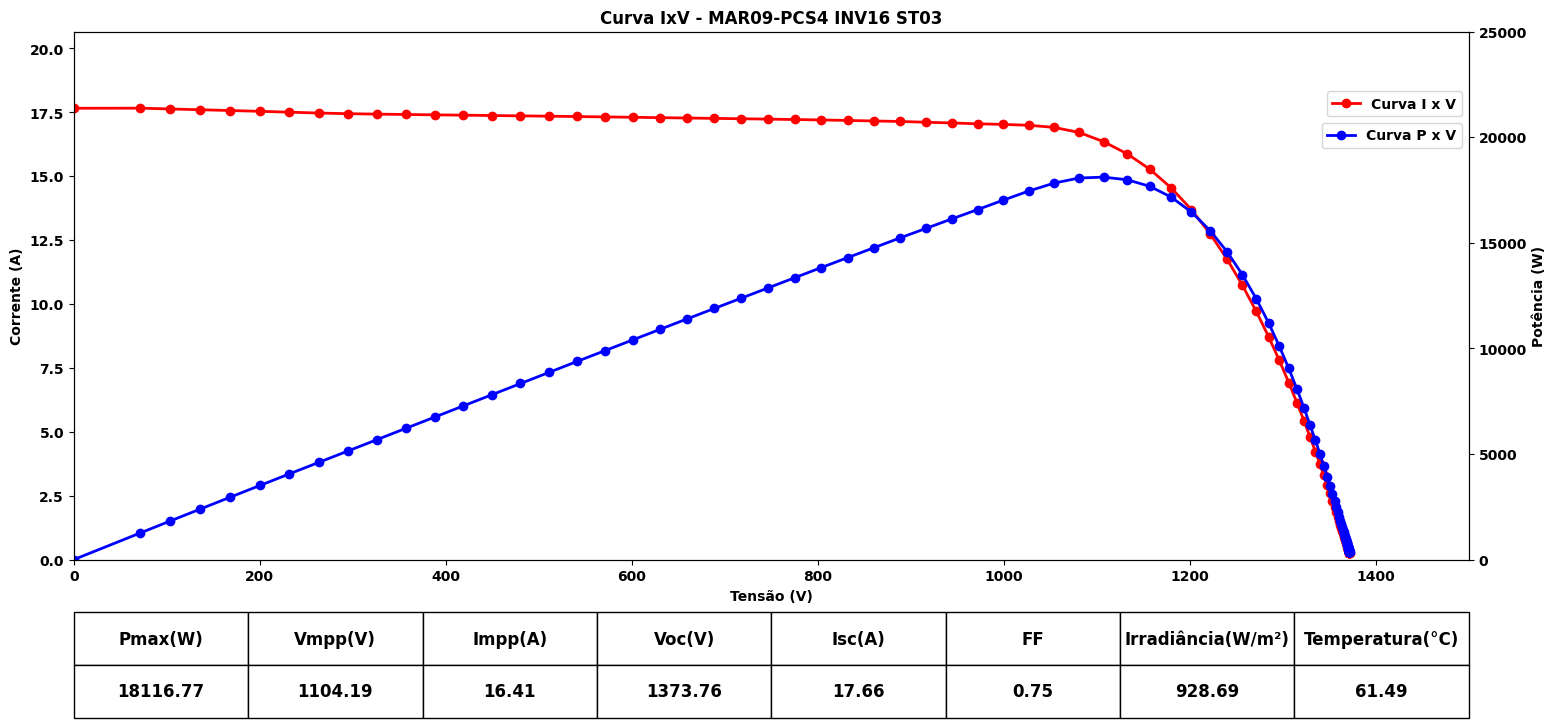

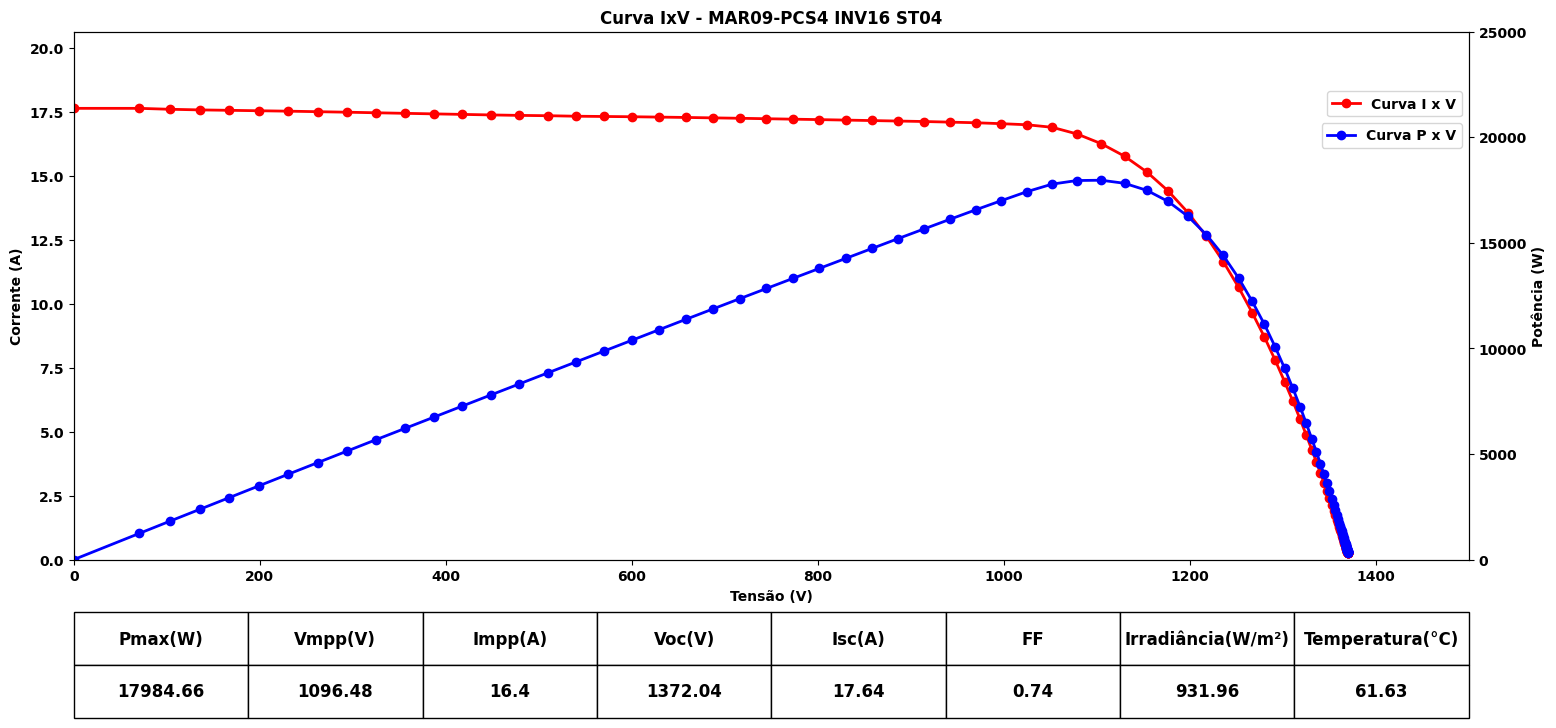

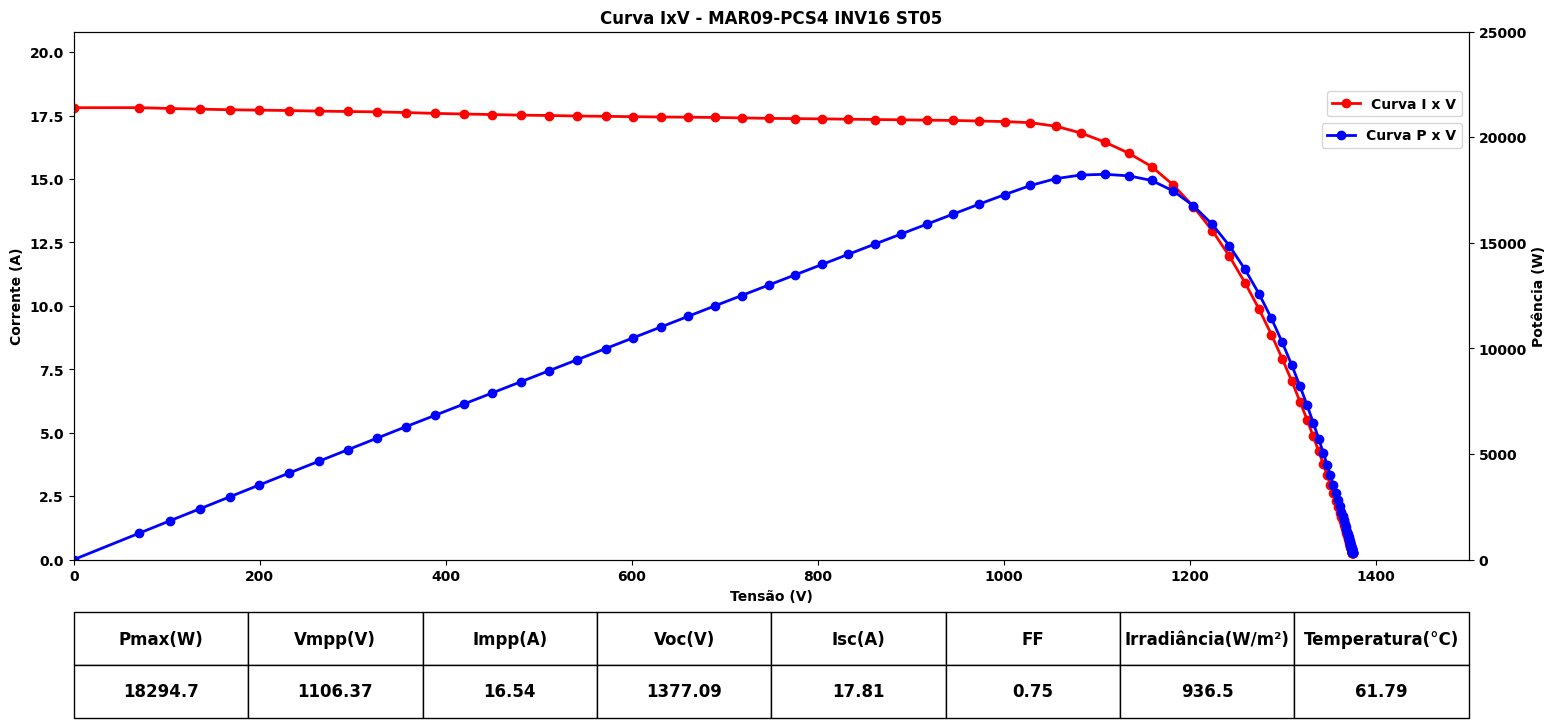

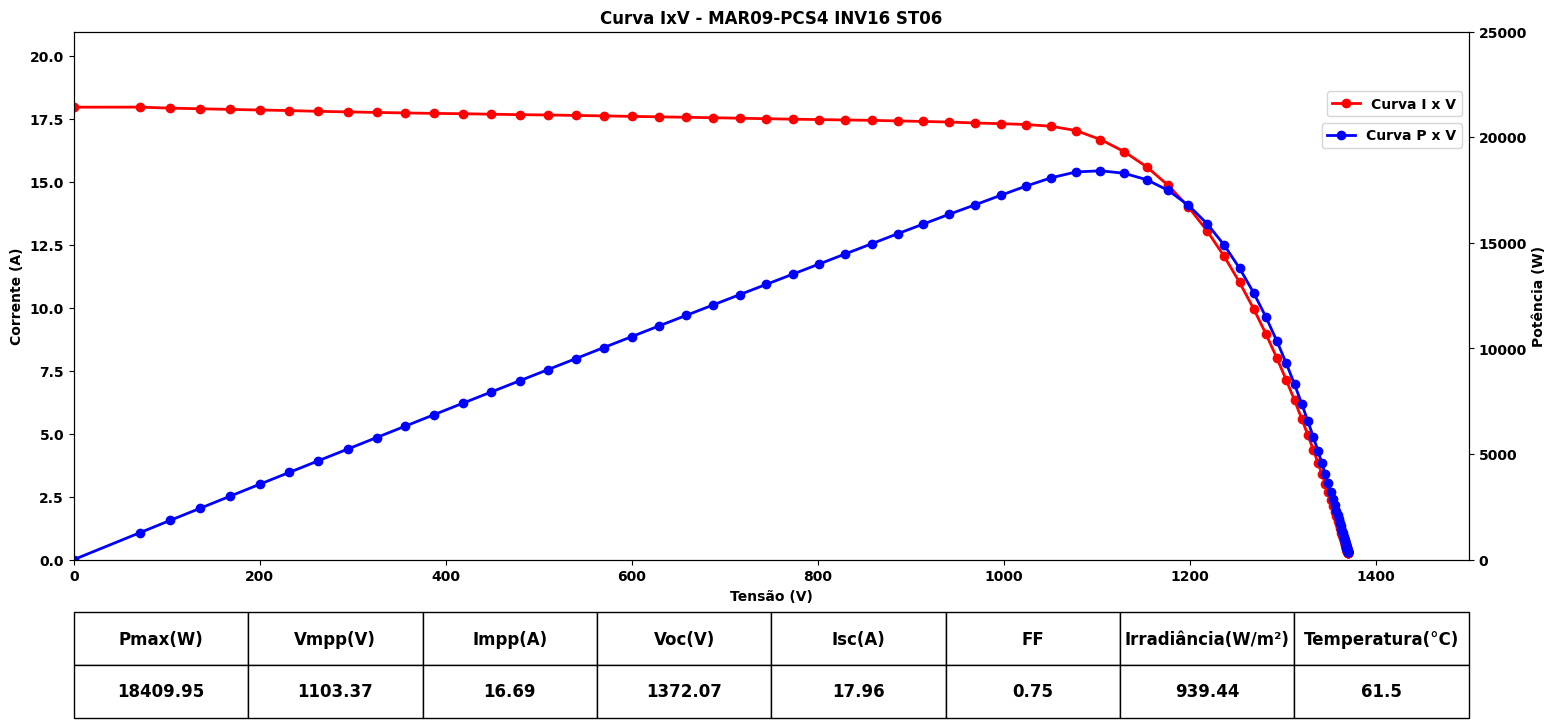

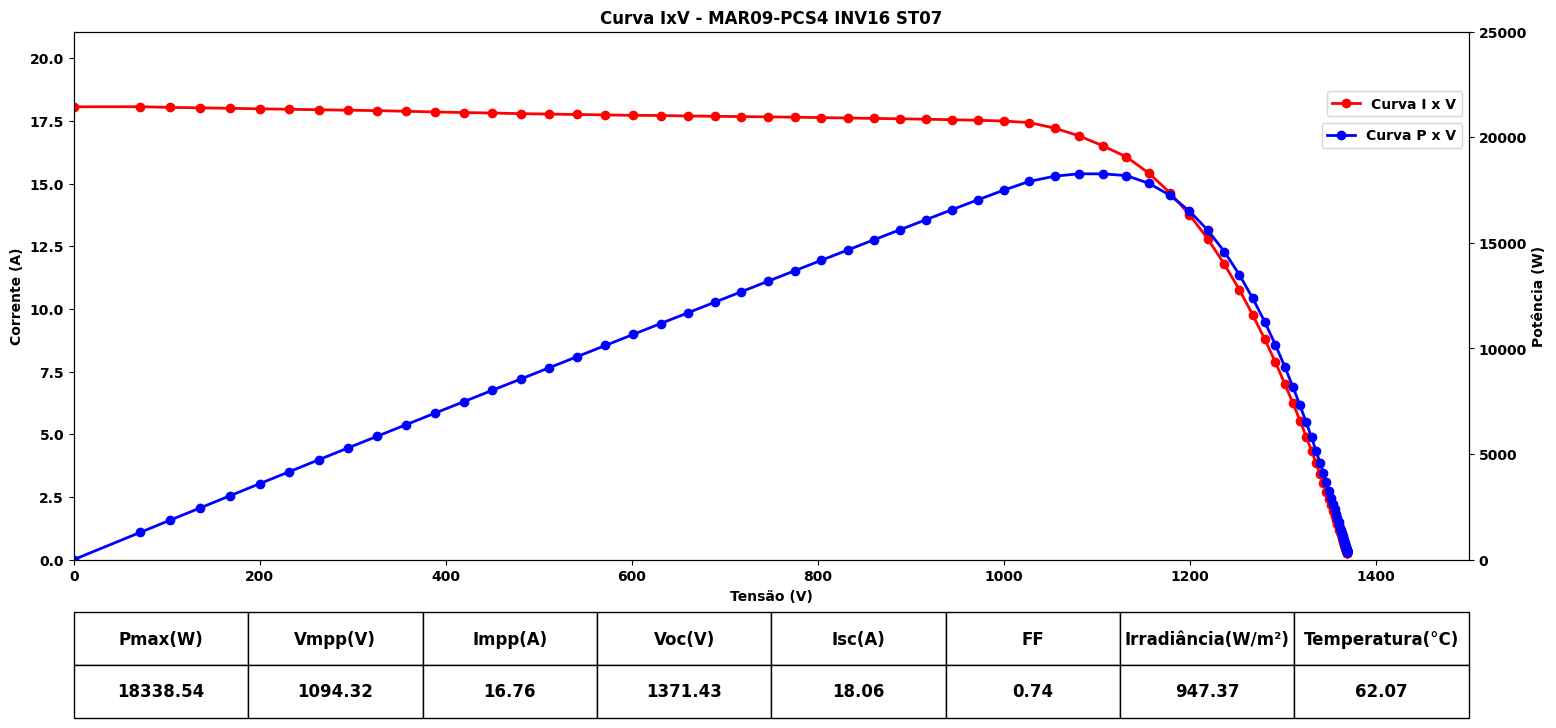

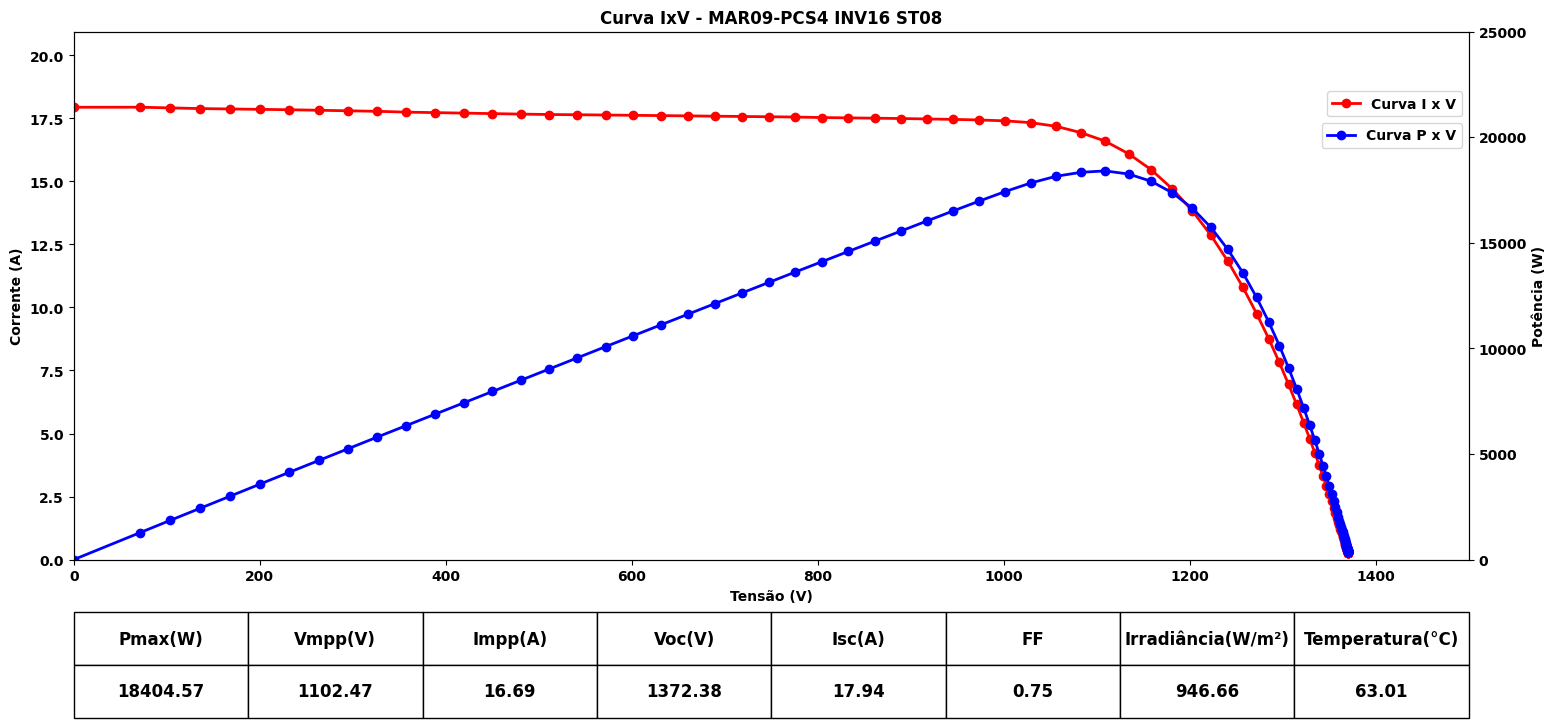

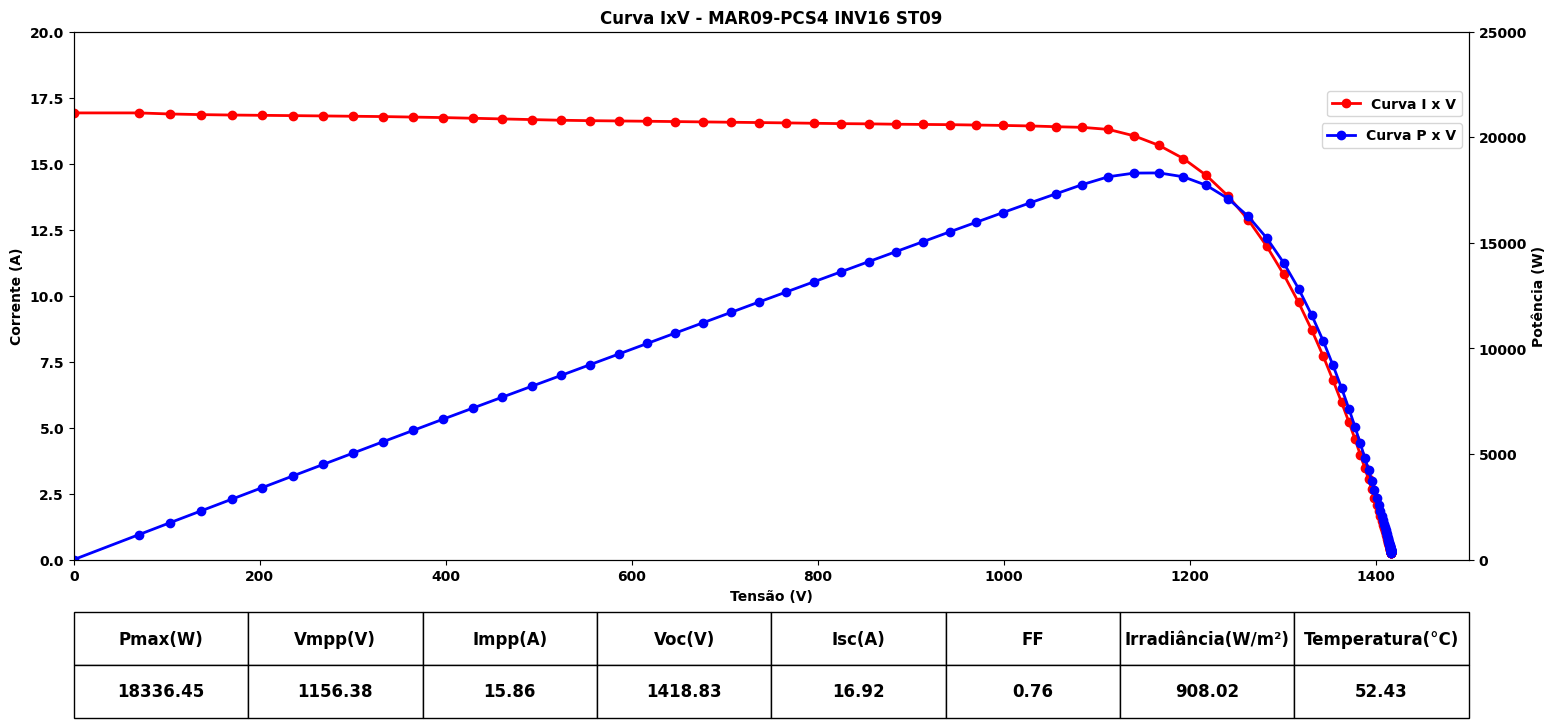

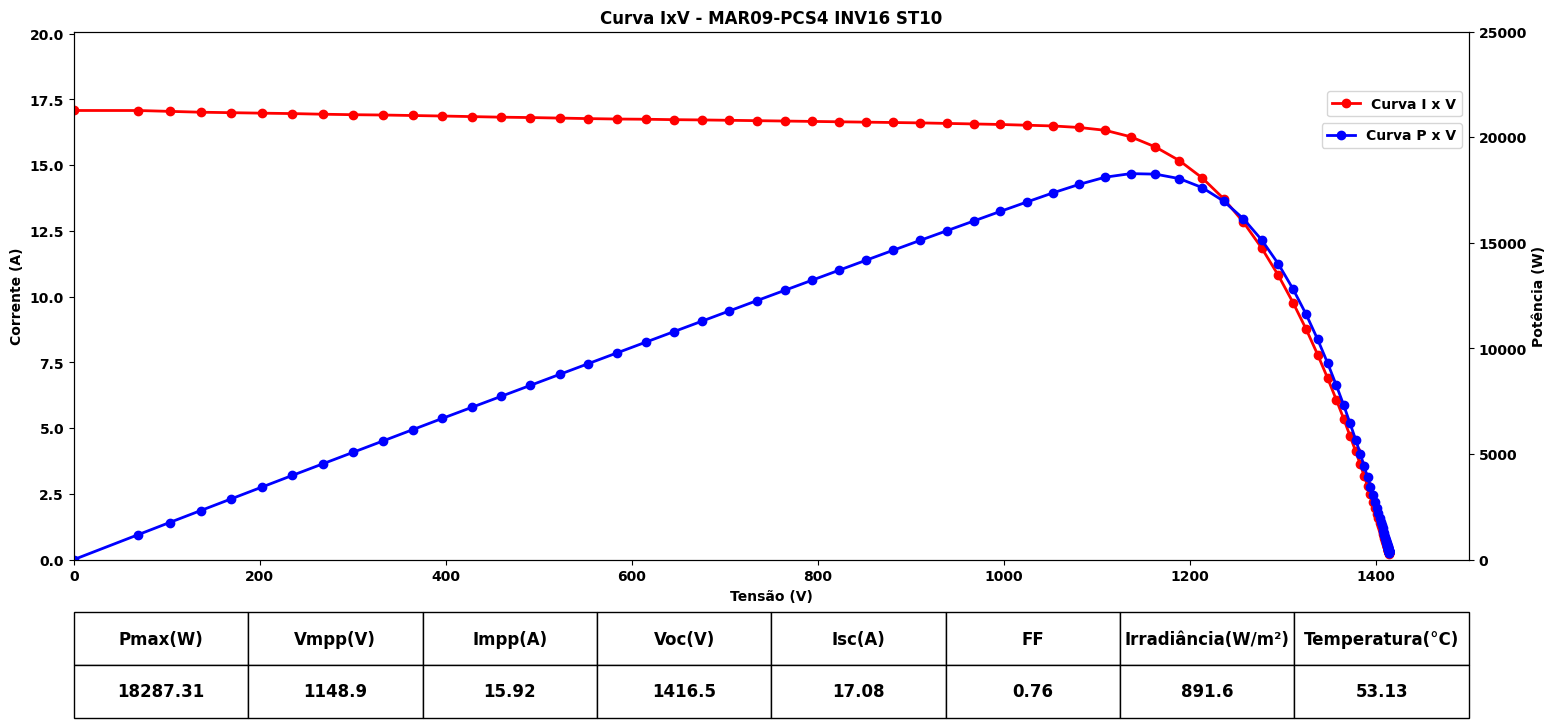

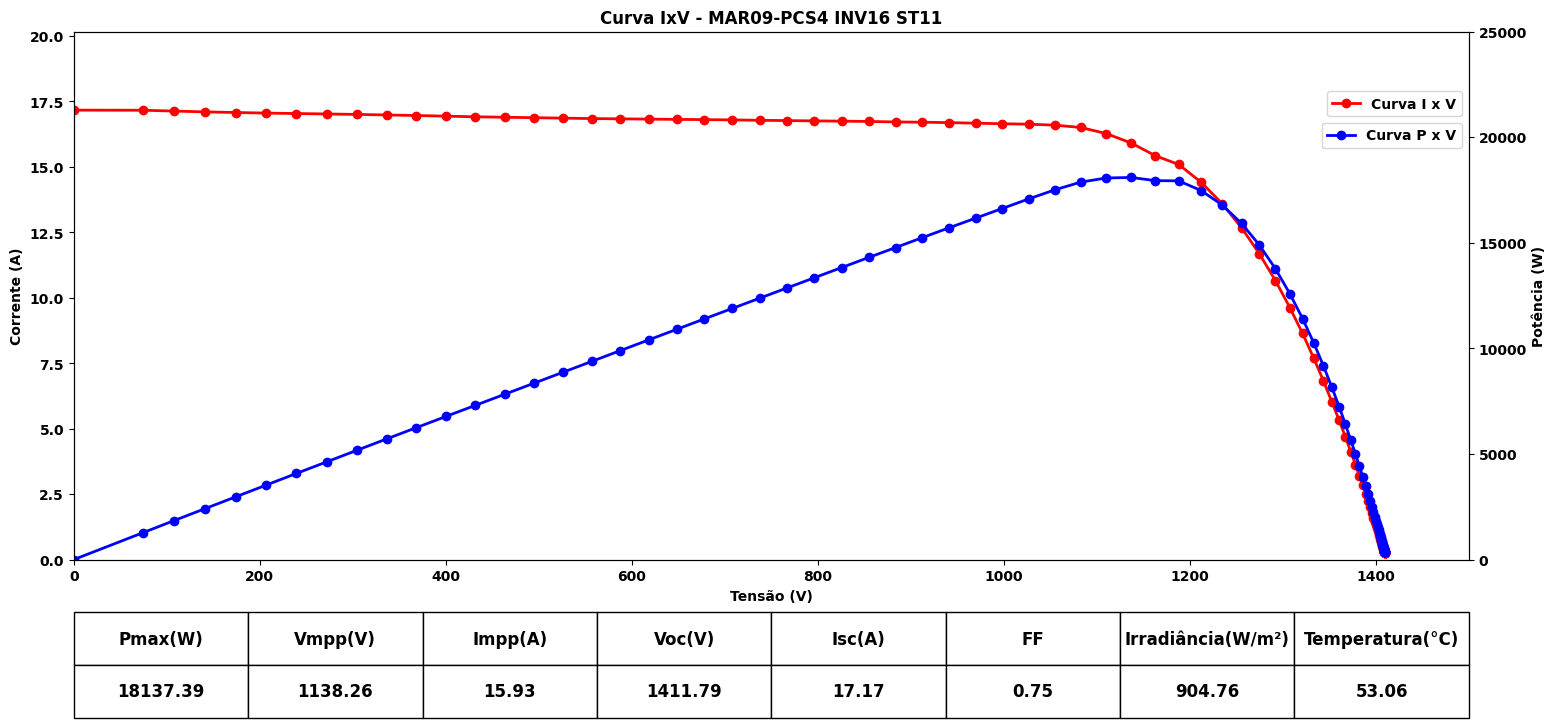

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Obtém o diretório atual
pasta_atual = os.getcwd()

# Lista os arquivos no diretório atual
arquivos = os.listdir(pasta_atual)

arquivos_csv = [arquivo for arquivo in arquivos if arquivo.endswith('.csv')]

quantidade_csv = len(arquivos_csv)

for i in range(quantidade_csv):
    arquivo_csv = arquivos[i]


    if len(arquivo_csv) == 13:
        nMAR = int(arquivo_csv[0])
        nPCS = int(arquivo_csv[2])
        nInv = int(arquivo_csv[4:6])
        ST = int(arquivo_csv[7:9])
    elif len(arquivo_csv) == 14:
        nMAR = int(arquivo_csv[0:2])
        nPCS = int(arquivo_csv[3])
        nInv = int(arquivo_csv[5:7])
        ST = int(arquivo_csv[8:10])

    if nMAR < 10:
        if nInv < 10:
            if ST < 10:
                tituloArquivo = f'MAR0{nMAR}-PCS{nPCS} INV0{nInv} ST0{ST}'
            else:
                tituloArquivo = f'MAR0{nMAR}-PCS{nPCS} INV0{nInv} ST{ST}'
        else:
            if ST < 10:
                tituloArquivo = f'MAR0{nMAR}-PCS{nPCS} INV{nInv} ST0{ST}'
            else:
                tituloArquivo = f'MAR0{nMAR}-PCS{nPCS} INV{nInv} ST{ST}'
    else:
        if nInv < 10:
            if ST < 10:
                tituloArquivo = f'MAR{nMAR}-PCS{nPCS} INV0{nInv} ST0{ST}'
            else:
                tituloArquivo = f'MAR{nMAR}-PCS{nPCS} INV0{nInv} ST{ST}'
        else:
            if ST < 10:
                tituloArquivo = f'MAR{nMAR}-PCS{nPCS} INV{nInv} ST0{ST}'
            else:
                tituloArquivo = f'MAR{nMAR}-PCS{nPCS} INV{nInv} ST{ST}'
                
    Mar = tituloArquivo[0:5]
    Pcs = tituloArquivo[6:10]
    Inv = tituloArquivo[14:16]
    tituloComp = tituloArquivo[0:16]

    # TRATAMENTO DOS DADOS DA TABELA
    # Leitura dos DataFrames
    df_valores = pd.read_csv(arquivo_csv, skiprows=13, sep='\t', nrows=5)
    df_irradiancia = pd.read_csv(arquivo_csv, skiprows=19, sep='\t', nrows=2)
    df_data = pd.read_csv(arquivo_csv, sep='\t', nrows=2)

    # Separação em listas
    valores_list = []
    valores1_list = []
    for index, row in df_valores.iterrows():
        # Extrai nome e valor de cada coluna
        valores_linha = []
        for col in df_valores.columns:
            nome_valor = f"{col}:{row[col]}"  # Combina nome e valor
            valores_linha.append(nome_valor)
        # Separa nome e valor, considerando colons nos dados
        valores_linha_split = [v.split(':', 1) for v in valores_linha]
        nomes, valores_str = zip(*valores_linha_split) # Desempacota listas

        # Extrai e converte valores em floats, removendo vírgulas, colchetes e o valor indesejado
        valores = [
            (valor.strip().split(',')[0].replace('[', '').replace(']', ''))
            for valor in valores_str]
        
        valores1 = [
            (valor.strip().split(',')[1].replace('[', '').replace(']', ''))
            for valor in valores_str]

        # Remove listas aninhadas indesejadas
        valores = [valor for valor in valores if not isinstance(valor, list)]
        valores1 = [valor for valor in valores1 if not isinstance(valor, list)]

        # Combina em uma lista com a formatação correta
        valores_list.append(valores)
        valores1_list.append(valores1)

    # Separação de dados em 'irradiancia_list' (mesmo processo)
    irradiancia_list = []
    irradiancia1_list = []
    for index, row in df_irradiancia.iterrows():
        irradiancia_linha = []
        irradiancia1_linha = []
        for col in df_irradiancia.columns:
            nome_valor = f"{col}:{row[col]}"
            irradiancia_linha.append(nome_valor)

        irradiancia_linha_split = [v.split(':', 1) for v in irradiancia_linha]
        _, irradiancia_str = zip(*irradiancia_linha_split)
        irradiancia = [
            (valor.strip().split(',')[0].replace('[', '').replace(']', ''))
            for valor in irradiancia_str
        ]
        irradiancia1 = [
            (valor.strip().split(',')[1].replace('[', '').replace(']', ''))
            for valor in irradiancia_str
        ]

        irradiancia_list.append(irradiancia)
        irradiancia1_list.append(irradiancia1)

    # Separação de dados em 'data_list' (mesmo processo)
    data_list = []
    data1_list = []
    for index, row in df_data.iterrows():
        data_linha = []
        for col in df_data.columns:
            nome_valor = f"{col}:{row[col]}"
            data_linha.append(nome_valor)

        data_linha_split = [v.split(':', 1) for v in data_linha]
        _, data_str = zip(*data_linha_split)
        data = [valor.strip().split(',')[0].replace('[', '').replace(']', '') for valor in data_str]
        data1 = [valor.strip().split(',')[1].replace('[','').replace(']', '') for valor in data_str]
        data_list.append(data)
        data1_list.append(data1)

    # Agora as listas 'valores_list', 'irradiancia_list' e 'data_list' contêm os valores separados!
    # print(valores_list)
    # print(valores1_list)
    # print(irradiancia_list)
    # print(irradiancia1_list)
    # print(data_list)
    # print(data1_list)


    # TRATAR O valores_list, data_list e irradiancia_list
    n1 = valores_list[0]
    n2 = valores_list[1]
    n3 = valores_list[2]
    n4 = valores_list[3]
    n5 = valores_list[4]
    n6 = irradiancia_list[0]
    n7 = irradiancia_list[1]
    n8 = data_list[0]
    n9 = data_list[1]

    v1 = valores1_list[0]
    v2 = valores1_list[1]
    v3 = valores1_list[2]
    v4 = valores1_list[3]
    v5 = valores1_list[4]
    v6 = irradiancia1_list[0]
    v7 = irradiancia1_list[1]
    v8 = data1_list[0]
    v9 = data1_list[1]

    Pmax = n1[0]+'(W)'
    Vmpp = n2[0]+'(V)'
    Impp = n3[0]+'(A)'
    Voc = n4[0]+'(V)'
    Isc = n5[0]+'(A)'
    Irradiancia = 'Irradiância(W/m²)'
    Temperatura = 'Temperatura(°C)'
    Data = n8[0]
    Hora = n9[0]
    FF = 'FF'

    vPmax = round(float(v1[0]), 2)
    vVmpp = round(float(v2[0]), 2)
    vImpp = round(float(v3[0]), 2)
    vVoc = round(float(v4[0]), 2)
    vIsc = round(float(v5[0]), 2)
    vIrradiancia = round(float(v6[0]), 2)
    vTemperatura = round(float(v7[0]), 2)
    vData = v8[0]
    vHora = v9[0][0:7]
    vFF = round(vVmpp*vImpp/(vVoc*vIsc), 2)

    if i == 0:
        vI = vIrradiancia
        vT = vTemperatura
        vD = vData
        vH = vHora

    #Criar um DataFrame com o  ponto (0,0)
    zero_point = pd.DataFrame({'VOLTS': [0], 'AMPS': [vIsc], 'WATTS': [0]})

    # Carregar o arquivo CSV pulando as linhas iniciais
    df = pd.read_csv(arquivo_csv, skiprows=47)
    df = pd.concat([zero_point, df])
    # print(df)

    # Renomear as colunas
    df.columns = ['Tensão (V)', 'Corrente (A)', 'Potência (W)']

    tabela = [[Pmax, Vmpp, Impp, Voc, Isc, FF, Irradiancia, Temperatura], [vPmax, vVmpp, vImpp, vVoc, vIsc, vFF, vIrradiancia, vTemperatura]]
    # print(vHora)
    # print(tabela)

    # Plotar a curva IxV com eixo vertical para Corrente (A) e Potência (W)
    fig, ax1 = plt.subplots()

    fig.set_figheight(6)
    fig.set_figwidth(18)

    # Plota Corrente (A) primeiro
    ax1.set_xlabel('Tensão (V)', fontweight='bold')
    plt.xticks(fontweight='bold')
    ax1.set_ylabel('Corrente (A)', fontweight='bold')
    plt.yticks(fontweight='bold')
    ax1.plot(df['Tensão (V)'], df['Corrente (A)'], 'r-o', linewidth=2, label='Curva I x V')

    # Adiciona o eixo secundário para Potência (W)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Potência (W)', fontweight='bold')
    plt.yticks(fontweight='bold')
    ax2.plot(df['Tensão (V)'], df['Potência (W)'], 'b-o', linewidth=2, label='Curva P x V')

    # Ajusta limites dos eixos x e y
    ax1.set_xlim(0, 1500)
    ax1.set_ylim(0, vIsc + 3 if  vIsc + 3 >= 20 else 20)
    ax2.set_ylim(0, vPmax + 6000 if vPmax + 6000 >= 25000 else 25000)

    # Personaliza o título e as legendas
    plt.title(F'Curva IxV - {tituloArquivo}', fontweight='bold')

    # Ajustar a posição da legenda Curva I x V
    ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
    for texto_legenda in ax1.get_legend().get_texts():
        texto_legenda.set_fontweight('bold')
    # Ajustar a posição da legenda Curva P x V
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.84))
    for texto_legenda in ax2.get_legend().get_texts():
        texto_legenda.set_fontweight('bold')


    # Plotar a tabela abaixo do gráfico

    table = ax1.table(cellText=tabela, loc='bottom', cellLoc='center', bbox=[0, -0.3, 1, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)

    for j in range(2):
        for i in range(len(tabela[j])):
            cell = table[j, i]
            cell.set_text_props(fontweight='bold')


    plt.subplots_adjust(bottom=0)


    plt.savefig(f'C:/Users/Darieldon/Desktop/DARIELDON/PROTOCOLOS/CURVA I X V/MODELO SOLMETRIC/UFV MARANGATU/{Mar}/{Pcs}/Inv{Inv}/Imagem/{tituloArquivo}.jpg', bbox_inches='tight', dpi=600)
    plt.show()

# PADRÃO SOLMETRIC

#  Adicionar data e hora na planilha


In [2]:
from openpyxl import Workbook, load_workbook
import xlwings as xw

planilha = xw.Book(f'C:/Users/Darieldon/Desktop/DARIELDON/PROTOCOLOS/CURVA I X V/MODELO SOLMETRIC/UFV MARANGATU/{Mar}/{Pcs}/Inv{Inv}/Protocolo/Relatório de Ensaio de Curva IxV - {tituloComp}.xlsm')

aba_ativa = planilha.sheets['BD']
aba_ativa.activate()

novaLista = [[vI], [vT], [vD], [vH]]

for i, row in enumerate(novaLista):
    print(i, row)
    aba_ativa.range(f'A{i+2}').value = row

planilha.save(f'C:/Users/Darieldon/Desktop/DARIELDON/PROTOCOLOS/CURVA I X V/MODELO SOLMETRIC/UFV MARANGATU/{Mar}/{Pcs}/Inv{Inv}/Protocolo/Relatório de Ensaio de Curva IxV - {tituloComp}.xlsm')

0 [927.78]
1 [60.61]
2 ['6/25/2024']
3 ['1:57:29']
